# FR Animation using networkx and matplotlib

[]

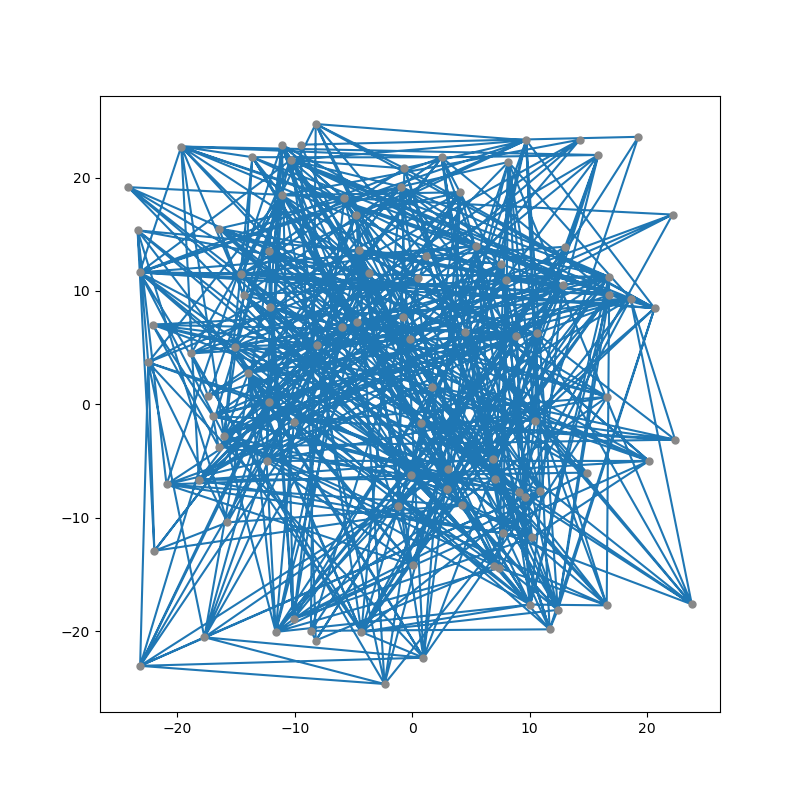

In [1]:
import networkx as nx;
import matplotlib.pyplot as plt;
import numpy as np;
import math;
from matplotlib.animation import FuncAnimation, writers
%matplotlib widget

# network = nx.gnp_random_graph(10,0.75)

#generating a geometric network
network = nx.random_geometric_graph(100,0.2);

iterations = 500;
viewSize = 50;
viscosity = 0.15;
alpha = 0.5;
a = 0.001;
b = 1.0;
deltaT = 1.0;

verticesCount = network.number_of_nodes();
edges = network.edges();

positionsX = viewSize*np.random.random(verticesCount)-viewSize/2.0;
positionsY = viewSize*np.random.random(verticesCount)-viewSize/2.0;

velocitiesX = np.zeros(verticesCount);
velocitiesY = np.zeros(verticesCount);

def iterate(iterationCount):
    global positionsX,positionsY,velocitiesX,velocitiesY;
    for iteration in range(iterationCount):
        forcesX = np.zeros(verticesCount);
        forcesY = np.zeros(verticesCount);
        #repulstive forces;
        for vertex1 in range(verticesCount):
            for vertex2 in range(vertex1):
                x1 = positionsX[vertex1];
                y1 = positionsY[vertex1];
                x2 = positionsX[vertex2];
                y2 = positionsY[vertex2];
                distance = math.sqrt((x2-x1)*(x2-x1) + (y2-y1)*(y2-y1)) + alpha;
                rx = (x2-x1)/distance;
                ry = (y2-y1)/distance;
                Fx = -b*rx/distance/distance;
                Fy = -b*ry/distance/distance;
                forcesX[vertex1] += Fx;
                forcesY[vertex1] += Fy;
                forcesX[vertex2] -= Fx;
                forcesY[vertex2] -= Fy;
        #attractive forces;
        for vFrom,vTo in edges:
            x1 = positionsX[vFrom];
            y1 = positionsY[vFrom];
            x2 = positionsX[vTo];
            y2 = positionsY[vTo];
            distance = math.sqrt((x2-x1)*(x2-x1) + (y2-y1)*(y2-y1));
            Rx = (x2-x1);
            Ry = (y2-y1);
            Fx = a*Rx*distance;
            Fy = a*Ry*distance;
            forcesX[vFrom] += Fx;
            forcesY[vFrom] += Fy;
            forcesX[vTo] -= Fx;
            forcesY[vTo] -= Fy;
        velocitiesX+=forcesX*deltaT;
        velocitiesX*=(1.0-viscosity);
        velocitiesY+=forcesY*deltaT;
        velocitiesY*=(1.0-viscosity);
        positionsX += velocitiesX*deltaT;
        positionsY += velocitiesY*deltaT;


# def drawGraph(i):
#     linesX = []
#     linesY = []
#     for edge in edges:
#         fx = positionsX[edge[0]];
#         fy = positionsY[edge[0]];
#         tx = positionsX[edge[1]];
#         ty = positionsY[edge[1]];
#         linesX.append(fx)
#         linesX.append(tx)
#         linesX.append(None)
#         linesY.append(fy)
#         linesY.append(ty)
#         linesY.append(None)

#     plt.plot(linesX,linesY);
#     plt.scatter(positionsX,positionsY,marker="o",s=50);

# for i in range(10):
#     iterate(10);
#     drawGraph(i);
#     plt.savefig("iteration%04d.png"%i);
#     plt.close();
    

def displayEdges():
    linesX = []
    linesY = []
    for edge in edges:
        fx = positionsX[edge[0]];
        fy = positionsY[edge[0]];
        tx = positionsX[edge[1]];
        ty = positionsY[edge[1]];
        linesX.append(fx)
        linesX.append(tx)
        linesX.append(None)
        linesY.append(fy)
        linesY.append(ty)
        linesY.append(None)
    return linesX,linesY;

linesX,linesY = displayEdges();
fig = plt.figure(figsize=(8,8));
pltEdges, =  plt.plot(linesX,linesY);
pltNodes, = plt.plot(positionsX,positionsY,marker="o",c="#888888",ms=5,linestyle = 'None');


def update(frame):
    iterate(1);
    linesX,linesY = displayEdges();
    pltEdges.set_data(linesX,linesY);
    pltNodes.set_data(positionsX,positionsY);
    plt.xlim(min(np.min(positionsX),-viewSize),max(np.max(positionsX),viewSize));
    plt.ylim(min(np.min(positionsY),-viewSize),max(np.max(positionsY),viewSize));

ani = FuncAnimation(fig, update, frames=np.linspace(0,1,500), interval=10, blit=False,repeat=False);

plt.plot()

